In [1]:
# --- 데이터를 가져온다.
from tensorflow.keras.datasets import mnist 

(X_train, y_train), (X_test, y_test)=mnist.load_data()



2023-12-09 15:47:07.313381: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-09 15:47:07.455957: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-09 15:47:07.455993: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-09 15:47:08.294741: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [3]:
print(y_test.shape)

(10000,)


In [4]:
import tensorflow as tf 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Flatten, Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.activations import relu, softmax 
from tensorflow.keras.losses import SparseCategoricalCrossentropy 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import SparseCategoricalAccuracy

inputs=Input(shape=(28,28))
# Flatten 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘리는 작업만 한다.
flatten=Flatten()(inputs)
hidden=Dense(128,activation=relu)(flatten)
hidden=BatchNormalization()(hidden)
hidden=Dense(64,activation=relu)(hidden)
hidden=Dense(32,activation=relu)(hidden)
hidden=Dropout(0.5)(hidden)
outputs=Dense(10,activation=softmax)(hidden)
model=Model(inputs,outputs)

2023-12-09 15:47:09.765663: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-09 15:47:09.765745: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-12-09 15:47:09.765794: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-12-09 15:47:09.765838: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-12-09 15:47:09.765882: W tensorfl

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                             

## 모델 학습

In [6]:
# 모델 학습 과정 정의
model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=SparseCategoricalAccuracy(name='accuracy')
)

In [7]:

history=model.fit(
    X_train, y_train,
    validation_split=0.2,
    callbacks=tf.keras.callbacks.EarlyStopping(
        patience=10,
        restore_best_weights=True
    ),
    epochs=1000
)

Epoch 1/1000
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5444 - accuracy: 0.8339 - val_loss: 0.1650 - val_accuracy: 0.9516
Epoch 2/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2856 - accuracy: 0.9224 - val_loss: 0.1271 - val_accuracy: 0.9629
Epoch 3/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2231 - accuracy: 0.9367 - val_loss: 0.1387 - val_accuracy: 0.9625
Epoch 4/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1860 - accuracy: 0.9480 - val_loss: 0.1161 - val_accuracy: 0.9685
Epoch 5/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1717 - accuracy: 0.9526 - val_loss: 0.1384 - val_accuracy: 0.9682
Epoch 6/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1508 - accuracy: 0.9577 - val_loss: 0.1138 - val_accuracy: 0.9722
Epoch 7/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1331 - accuracy: 0.9630 - val_loss: 0.1266 -

In [8]:
import pandas as pd

hist_df=pd.DataFrame(history.history)
hist_df 

,loss,accuracy,val_loss,val_accuracy
0,0.544420,0.833854,0.164968,0.951583
1,0.285611,0.922396,0.127109,0.962917
2,0.223118,0.936750,0.138692,0.962500
3,0.185957,0.948021,0.116051,0.968500
4,0.171661,0.952563,0.138406,0.968250
5,0.150768,0.957687,0.113825,0.972167
6,0.133143,0.963021,0.126593,0.969583
7,0.119914,0.966250,0.113134,0.975667
8,0.119994,0.966750,0.134906,0.973833
9,0.107150,0.969896,0.112462,0.974500


<AxesSubplot: title={'center': 'Loss/Val Loss'}>

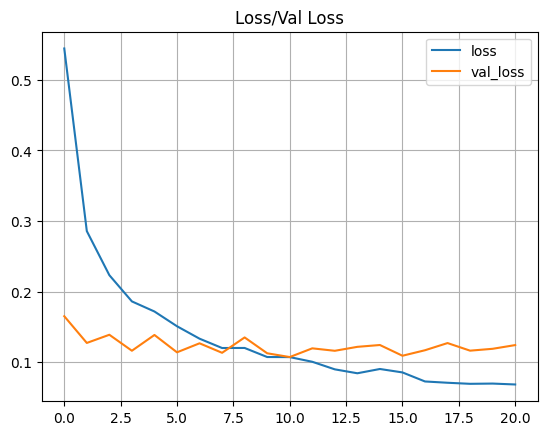

In [9]:
hist_df[['loss','val_loss']].plot(title='Loss/Val Loss',grid=True)

<AxesSubplot: title={'center': 'Accuracy/Val Accuracy'}>

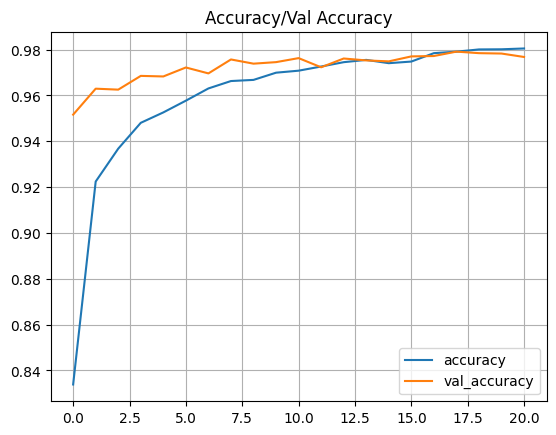

In [10]:
hist_df[['accuracy','val_accuracy']].plot(title='Accuracy/Val Accuracy',grid=True)

## 모델 평가

In [11]:
# --- 모델 평가 (실행할 때마다 결괏값이 약간 다를 수 있다.)

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1113 - accuracy: 0.9764


[0.11126308888196945, 0.9764000177383423]

#### 간단한 논의

모델이 테스트 데이터를 평가한 결과 0.9764로 매우 높은 정확도가 나왔다. 그리고

검증 데이터와 테스트 데이터의 정확도 차이가 크지 않아 모델이 새로운 데이터에 대해서도 

일반화가 잘 되었다고 볼 수 있다.

## 모델 저장

In [12]:
%cd /dshome/WoongLab/heo/final_machinelearning_deeplearning_exam

/dshome/WoongLab/heo/final_machinelearning_deeplearning_exam


In [13]:
# 학습한 모델을 저장한다.

model.save(f'minist.keras')